In [18]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

In [54]:
# Step 1: Prepare your data (replace this with your actual values)
ec_values = np.array([
    775.75, 570.95, 287.75, 335.6, 180.55,
    872.45, 2679.9, 214.5,
    194.75, 703.65, 104.1, 310.15, 274.5,
    381.7, 662.75, 563.2, 1659.1, 60.75
])

# Corresponding moisture % from lab
desired_moisture = np.array([
    19.7, 20.9, 23.0, 23.6, 21.0,
    23.7, 31.6, 21.6,
    18.9, 19.9, 18.0, 20.7, 20.6,
    19.8, 20.8, 20.5, 24.9, 20.0
])

# Step 2: Reshape EC values for sklearn
X = ec_values.reshape(-1, 1)
y = desired_moisture

# Step 3: Create polynomial regression model (degree 2)
model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
model.fit(X, y)

# Step 4: Extract coefficients
a = model.named_steps['linearregression'].coef_[2]
b = model.named_steps['linearregression'].coef_[1]
c = model.named_steps['linearregression'].intercept_

print("Your formula:")
print(f"Moisture = ({a:.8f} * EC^2) + ({b:.5f} * EC) + ({c:.5f})")


Your formula:
Moisture = (0.00000140 * EC^2) + (0.00046 * EC) + (20.29594)


In [56]:
# improvements, calibrate using lab conitions. calibrate in controlled temperature (25C)
# add more samples

percent_errors = []
for i in range(len(ec_values)):
    ec = ec_values[i]
    target = desired_moisture[i]

    get_moisture = (a * ec * ec) + (b * ec) + c
    percent_error = abs((get_moisture - target) / target) * 100
    percent_errors.append(percent_error)

    print(f"{ec:.2f} µS/cm → Test Moisture: {get_moisture:.5f} | Desired: {target:.2f} | Percent Error: {percent_error:.2f}%")

775.75 µS/cm → Test Moisture: 21.49397 | Desired: 19.70 | Percent Error: 9.11%
570.95 µS/cm → Test Moisture: 21.01438 | Desired: 20.90 | Percent Error: 0.55%
287.75 µS/cm → Test Moisture: 20.54421 | Desired: 23.00 | Percent Error: 10.68%
335.60 µS/cm → Test Moisture: 20.60793 | Desired: 23.60 | Percent Error: 12.68%
180.55 µS/cm → Test Moisture: 20.42469 | Desired: 21.00 | Percent Error: 2.74%
872.45 µS/cm → Test Moisture: 21.76113 | Desired: 23.70 | Percent Error: 8.18%
2679.90 µS/cm → Test Moisture: 31.56135 | Desired: 31.60 | Percent Error: 0.12%
214.50 µS/cm → Test Moisture: 20.45907 | Desired: 21.60 | Percent Error: 5.28%
194.75 µS/cm → Test Moisture: 20.43868 | Desired: 18.90 | Percent Error: 8.14%
703.65 µS/cm → Test Moisture: 21.31177 | Desired: 19.90 | Percent Error: 7.09%
104.10 µS/cm → Test Moisture: 20.35906 | Desired: 18.00 | Percent Error: 13.11%
310.15 µS/cm → Test Moisture: 20.57324 | Desired: 20.70 | Percent Error: 0.61%
274.50 µS/cm → Test Moisture: 20.52770 | Desired

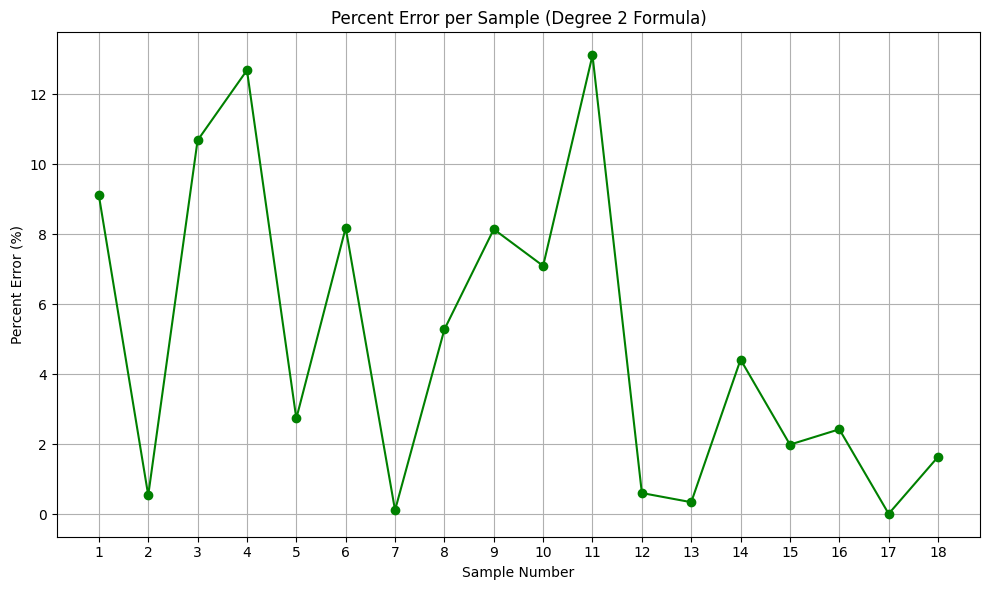

In [38]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(percent_errors) + 1), percent_errors, marker='o', linestyle='-', color='green')
plt.title("Percent Error per Sample (Degree 2 Formula)")
plt.xlabel("Sample Number")
plt.ylabel("Percent Error (%)")
plt.xticks(range(1, len(percent_errors) + 1))
plt.grid(True)
plt.tight_layout()
plt.show()